### Import Packages

In [1]:
import torch
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
import torch.nn as nn
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pyDOE import lhs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =6,6
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import CubicSpline
from scipy.integrate import odeint
import tensorflow.compat.v1 as tff
tff.disable_v2_behavior()
np.random.seed(1234)
tff.random.set_random_seed(1234)
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib.dates as dates
import matplotlib as mpl
from rnn_models import *
from EINN_model import *
from cross_val import *
import matplotlib.dates as dates

Instructions for updating:
non-resource variables are not supported in the long term


### Output Folder

In [2]:
c_dir =os.getcwd()
path = '/Results/' 
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out) 

c_dir =os.getcwd()
path = '/Models/' 
out1 = c_dir +path
if not os.path.exists(out1):
    os.makedirs(out1)

### Data for Tennessee and New York

In [3]:
##Tennessee
data =pd.read_csv('Data/tndata.csv')
tdat=data.reindex(index=data.index[::-1])
I_new_sta= tdat['NEW_CONFIRMED']
##New York
# data1 =pd.read_csv('Data/nyc_data_cases.csv')
# ndat=data1
# I_new_sta=ndat['CASE_COUNT']

I_new_sta = I_new_sta.rolling(window=7).mean()
I_new_sta = I_new_sta.to_numpy(dtype=np.float64)
I_new_sta = I_new_sta[6:]
I_new_sta = I_new_sta.reshape([len(I_new_sta), 1]) 

## RESNET

### Pre-trained with Tennessee Data

In [4]:
# def resnet(data, epochs, neurons, split, bs, num):
#     inputs = keras.Input(shape=(1))
#     x = layers.Dense(neurons,activation='tanh',bias_initializer='zeros',kernel_initializer='random_normal')(inputs)
#     x1 = layers.Dense(neurons, activation='tanh')(x)
#     x2 = layers.Dense(neurons, activation='tanh')(x1)
#     x3 = layers.Dense(neurons, activation='tanh')(x2)
#     x4 = layers.Add()([x3, x])
#     outputs = layers.Dense(1)(x4)
#     resModel = keras.Model(inputs, outputs)
#     resModel.summary()
    
#     ##Rescale the data
#     z =data
#     xdata =np.arange(len(z)).reshape((-1,1))
#     sf =1e-4
#     zz=z*sf
#     #compile and train the model
#     resModel.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=keras.losses.mse)
#     hist =resModel.fit(xdata, zz, batch_size=bs, epochs=epochs,verbose=0,validation_split=split, shuffle=True)
    
#     #save the pre-trained model
#     resModel.save(out1+"resnet.model")
    
# I_new_star_train =I_new_sta[290:,:]
# num =len(I_new_star_train)
# resnet(I_new_star_train, 4000, 50, 0.0, 10, num)

## Load Pre-Trained Model: ResNet

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


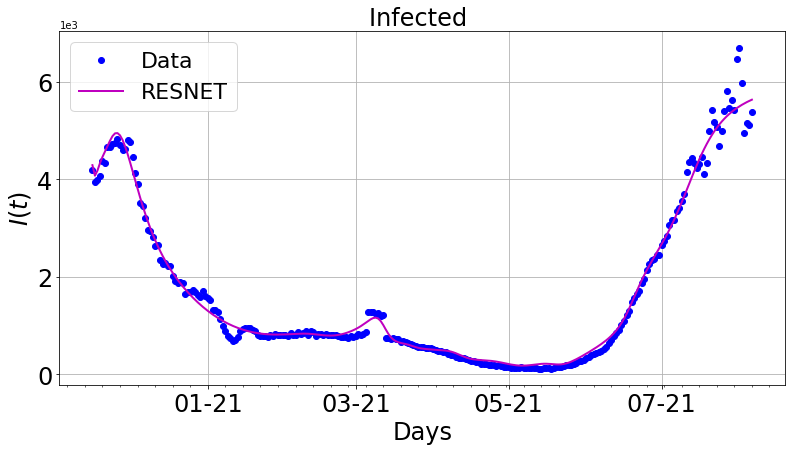

In [5]:
resnet_model =tf.keras.models.load_model("Models/resnet.model")
z =I_new_sta[290:,:]  ##You can choose
num =len(z)
xdata =np.arange(len(z)).reshape((-1,1))
y0=resnet_model.predict(xdata)
sf =1e-4
ydata =y0/sf
np.save(out+'resnetdata.npy', ydata)
stime ='2020-11-16'
st=dates.datestr2num(stime)
dtrange=np.arange(num)
dtrange =dtrange +st
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange, z,'ob', lw=2,label=r'Data')
ax.plot(dtrange, ydata, 'm', lw=2,label=r'RESNET')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.grid(True)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$I(t)$', fontsize = font) 
ax.set_title(r'Infected ',  fontsize = font)
fig.set_size_inches(w=13,h=6.5)
plt.show()

## Error Metrics for Data Driven Simulation

## RNN Models

In [6]:
##define the data
realDat =z
resnetDat=np.load("Results/resnetdata.npy")

### GRU

In [7]:
batch_size=32
actual_g, pred_g, train_act_g, train_prd_g, test_act_g, test_prd_g, ep_g, loss_g =run_model(realDat , "Real", 0.0, "GRU", "TN", 1500, batch_size)

TN outcomes............
GRU Training
Epoch 100/1500, Total Loss: 5.461e-04, Time:0.03 seconds
Epoch 200/1500, Total Loss: 6.108e-04, Time:0.02 seconds
Epoch 300/1500, Total Loss: 3.466e-04, Time:0.02 seconds
Epoch 400/1500, Total Loss: 2.829e-04, Time:0.03 seconds
Epoch 500/1500, Total Loss: 5.931e-04, Time:0.03 seconds
Epoch 600/1500, Total Loss: 2.369e-04, Time:0.02 seconds
Epoch 700/1500, Total Loss: 2.226e-04, Time:0.03 seconds
Epoch 800/1500, Total Loss: 2.596e-04, Time:0.03 seconds
Epoch 900/1500, Total Loss: 3.372e-04, Time:0.03 seconds
Epoch 1000/1500, Total Loss: 2.690e-04, Time:0.03 seconds
Epoch 1100/1500, Total Loss: 2.829e-04, Time:0.03 seconds
Epoch 1200/1500, Total Loss: 2.205e-04, Time:0.03 seconds
Epoch 1300/1500, Total Loss: 2.599e-04, Time:0.03 seconds
Epoch 1400/1500, Total Loss: 2.231e-04, Time:0.03 seconds
Epoch 1500/1500, Total Loss: 2.352e-04, Time:0.03 seconds
GRU Total Training Time in seconds 38.50664281845093
Evaluation Time: 0.00485539436340332
RMSE for Rea

### LSTM

In [8]:
batch_size=64
actual_l, pred_l, train_act_l, train_prd_l, test_act_l, test_prd_l, ep_l, loss_l =run_model(realDat , "Real", 0.0, "LSTM", "TN",  1500, batch_size)

TN outcomes............
LSTM Training
Epoch 100/1500, Total Loss: 5.707e-04, Time:0.01 seconds
Epoch 200/1500, Total Loss: 3.510e-04, Time:0.02 seconds
Epoch 300/1500, Total Loss: 2.727e-04, Time:0.02 seconds
Epoch 400/1500, Total Loss: 4.146e-04, Time:0.01 seconds
Epoch 500/1500, Total Loss: 3.823e-04, Time:0.01 seconds
Epoch 600/1500, Total Loss: 3.679e-04, Time:0.02 seconds
Epoch 700/1500, Total Loss: 2.594e-04, Time:0.02 seconds
Epoch 800/1500, Total Loss: 2.612e-04, Time:0.01 seconds
Epoch 900/1500, Total Loss: 2.129e-04, Time:0.02 seconds
Epoch 1000/1500, Total Loss: 2.325e-04, Time:0.02 seconds
Epoch 1100/1500, Total Loss: 2.273e-04, Time:0.01 seconds
Epoch 1200/1500, Total Loss: 3.728e-04, Time:0.01 seconds
Epoch 1300/1500, Total Loss: 2.292e-04, Time:0.01 seconds
Epoch 1400/1500, Total Loss: 2.289e-04, Time:0.01 seconds
Epoch 1500/1500, Total Loss: 2.460e-04, Time:0.01 seconds
LSTM Total Training Time in seconds 21.913079023361206
Evaluation Time: 0.0040988922119140625
RMSE fo

### BiLSTM

In [9]:
batch_size=64
actual_b, pred_b, train_act_b, train_prd_b, test_act_b, test_prd_b, ep_b, loss_b =run_model(realDat , "Real", 0.0, "BiLSTM", "TN", 1500, batch_size)

TN outcomes............
BiLSTM Training
Epoch 100/1500, Total Loss: 4.673e-04, Time:0.02 seconds
Epoch 200/1500, Total Loss: 3.588e-04, Time:0.02 seconds
Epoch 300/1500, Total Loss: 3.357e-04, Time:0.02 seconds
Epoch 400/1500, Total Loss: 2.022e-04, Time:0.02 seconds
Epoch 500/1500, Total Loss: 2.082e-04, Time:0.02 seconds
Epoch 600/1500, Total Loss: 2.625e-04, Time:0.02 seconds
Epoch 700/1500, Total Loss: 2.976e-04, Time:0.02 seconds
Epoch 800/1500, Total Loss: 3.210e-04, Time:0.02 seconds
Epoch 900/1500, Total Loss: 1.974e-04, Time:0.02 seconds
Epoch 1000/1500, Total Loss: 2.261e-04, Time:0.02 seconds
Epoch 1100/1500, Total Loss: 2.491e-04, Time:0.02 seconds
Epoch 1200/1500, Total Loss: 1.830e-04, Time:0.02 seconds
Epoch 1300/1500, Total Loss: 2.726e-04, Time:0.02 seconds
Epoch 1400/1500, Total Loss: 1.763e-04, Time:0.02 seconds
Epoch 1500/1500, Total Loss: 2.002e-04, Time:0.02 seconds
BiLSTM Total Training Time in seconds 29.5520122051239
Evaluation Time: 0.006126880645751953
RMSE f

# Hybrid Approaches

### ResNet-GRU

In [10]:
batch_size=64
actual_gs6, pred_gs6, train_act_gs6, train_prd_gs6, test_act_gs6, test_prd_gs6, ep_gs6, loss_gs6 =run_model(resnetDat, "RESNET", 0.0, "GRU", "TN", 3000, batch_size)

TN outcomes............
GRU Training
Epoch 100/3000, Total Loss: 7.181e-04, Time:0.01 seconds
Epoch 200/3000, Total Loss: 5.316e-04, Time:0.01 seconds
Epoch 300/3000, Total Loss: 2.992e-04, Time:0.01 seconds
Epoch 400/3000, Total Loss: 2.207e-04, Time:0.01 seconds
Epoch 500/3000, Total Loss: 1.528e-04, Time:0.02 seconds
Epoch 600/3000, Total Loss: 3.188e-04, Time:0.01 seconds
Epoch 700/3000, Total Loss: 1.534e-04, Time:0.01 seconds
Epoch 800/3000, Total Loss: 1.332e-04, Time:0.01 seconds
Epoch 900/3000, Total Loss: 1.610e-04, Time:0.01 seconds
Epoch 1000/3000, Total Loss: 2.008e-04, Time:0.01 seconds
Epoch 1100/3000, Total Loss: 2.503e-04, Time:0.01 seconds
Epoch 1200/3000, Total Loss: 1.526e-04, Time:0.01 seconds
Epoch 1300/3000, Total Loss: 1.921e-04, Time:0.01 seconds
Epoch 1400/3000, Total Loss: 1.112e-04, Time:0.01 seconds
Epoch 1500/3000, Total Loss: 1.315e-04, Time:0.01 seconds
Epoch 1600/3000, Total Loss: 7.736e-05, Time:0.01 seconds
Epoch 1700/3000, Total Loss: 1.093e-04, Time

### ResNet-LSTM

In [11]:
batch_size=32
actual_bs6, pred_bs6, train_act_bs6, train_prd_bs6, test_act_bs6, test_prd_bs6, ep_bs6, loss_bs6=run_model(resnetDat, "RESNET", 0.0, "BiLSTM", "TN", 1500, batch_size)

TN outcomes............
BiLSTM Training
Epoch 100/1500, Total Loss: 2.544e-04, Time:0.04 seconds
Epoch 200/1500, Total Loss: 1.741e-04, Time:0.04 seconds
Epoch 300/1500, Total Loss: 1.298e-04, Time:0.05 seconds
Epoch 400/1500, Total Loss: 8.826e-05, Time:0.04 seconds
Epoch 500/1500, Total Loss: 9.887e-05, Time:0.04 seconds
Epoch 600/1500, Total Loss: 2.007e-04, Time:0.04 seconds
Epoch 700/1500, Total Loss: 1.139e-04, Time:0.04 seconds
Epoch 800/1500, Total Loss: 9.635e-05, Time:0.04 seconds
Epoch 900/1500, Total Loss: 9.123e-05, Time:0.04 seconds
Epoch 1000/1500, Total Loss: 9.122e-05, Time:0.04 seconds
Epoch 1100/1500, Total Loss: 1.040e-04, Time:0.04 seconds
Epoch 1200/1500, Total Loss: 8.180e-05, Time:0.04 seconds
Epoch 1300/1500, Total Loss: 7.710e-05, Time:0.04 seconds
Epoch 1400/1500, Total Loss: 6.599e-05, Time:0.04 seconds
Epoch 1500/1500, Total Loss: 6.298e-05, Time:0.04 seconds
BiLSTM Total Training Time in seconds 56.99271607398987
Evaluation Time: 0.004548549652099609
RMSE 

### ResNet-BiLSTM

In [12]:

batch_size=32
actual_ls6, pred_ls6, train_act_ls6, train_prd_ls6, test_act_ls6, test_prd_ls6, ep_ls6, loss_ls6 =run_model(resnetDat, "RESNET", 0.0, "LSTM", "TN", 1500, batch_size)


TN outcomes............
LSTM Training
Epoch 100/1500, Total Loss: 4.951e-04, Time:0.03 seconds
Epoch 200/1500, Total Loss: 3.856e-04, Time:0.03 seconds
Epoch 300/1500, Total Loss: 3.105e-04, Time:0.03 seconds
Epoch 400/1500, Total Loss: 1.863e-04, Time:0.03 seconds
Epoch 500/1500, Total Loss: 4.075e-04, Time:0.02 seconds
Epoch 600/1500, Total Loss: 1.062e-04, Time:0.03 seconds
Epoch 700/1500, Total Loss: 1.174e-04, Time:0.03 seconds
Epoch 800/1500, Total Loss: 3.353e-04, Time:0.03 seconds
Epoch 900/1500, Total Loss: 1.175e-04, Time:0.03 seconds
Epoch 1000/1500, Total Loss: 1.429e-04, Time:0.03 seconds
Epoch 1100/1500, Total Loss: 1.241e-04, Time:0.03 seconds
Epoch 1200/1500, Total Loss: 1.628e-04, Time:0.03 seconds
Epoch 1300/1500, Total Loss: 2.958e-04, Time:0.03 seconds
Epoch 1400/1500, Total Loss: 1.010e-04, Time:0.03 seconds
Epoch 1500/1500, Total Loss: 1.371e-04, Time:0.03 seconds
LSTM Total Training Time in seconds 40.28815317153931
Evaluation Time: 0.004204988479614258
RMSE for 

## Plot

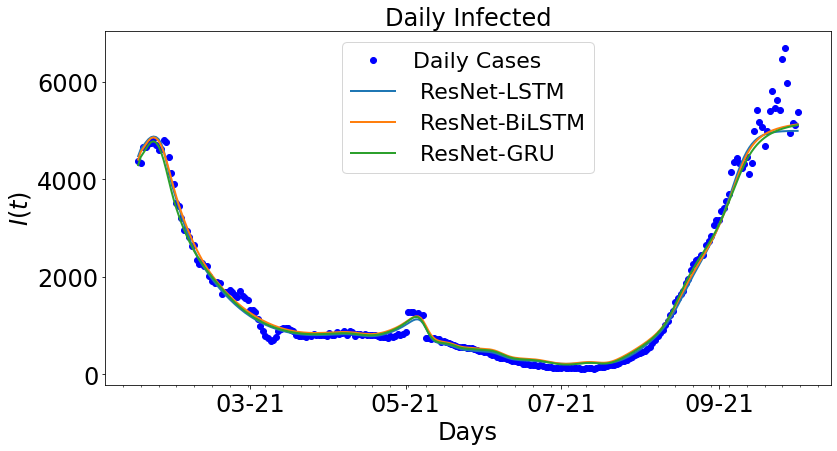

In [13]:
stime ='2021-01-16'
st=dates.datestr2num(stime)
dtrange=np.arange(260)
dtrange =dtrange +st 
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange,realDat[4:] , 'ob',  lw=2,label='Daily Cases')
ax.plot(dtrange, pred_ls6,  lw=2,label =' ResNet-LSTM')
ax.plot(dtrange,pred_bs6,  lw=2,label=' ResNet-BiLSTM')
ax.plot(dtrange,pred_gs6,  lw=2,label =' ResNet-GRU')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$I(t)$', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=6.5)
plt.show()

## Cross Validation

0
0
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.889e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.399e-04
Epoch: 1000, loss: 1.025e-05
Epoch: 1500, loss: 5.506e-06
Epoch: 2000, loss: 3.261e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1464016437530518
1
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.710e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.337e-05
Epoch: 1000, loss: 1.240e-05
Epoch: 1500, loss: 5.311e-06
Epoch: 2000, loss: 4.514e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1226933002471924
2
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.875e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.917e-05
Epoch: 1000, loss: 1.333e-05
Epoch: 1500, loss: 1.330e-05
Epoch: 2000, loss: 7.154e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.13972544670105
3
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.297e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.802e-05
Epoch: 1000, loss: 8.984e-06
Epoch: 1500, loss: 4.257e-06
Epoch: 2000, loss: 1.064e-05
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1213839054107666
Average RMSE score 0.003297548508271575 for ResNet-LSTM
std score 0.0011932061752304435 for ResNet-LSTM
Total Cross Val Time 21.45
0
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.298e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.425e-04
Epoch: 1000, loss: 1.115e-05
Epoch: 1500, loss: 4.787e-06
Epoch: 2000, loss: 1.360e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.618584394454956
1
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.307e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.519e-04
Epoch: 1000, loss: 3.139e-06
Epoch: 1500, loss: 2.316e-06
Epoch: 2000, loss: 2.172e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.6226131916046143
2
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.214e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.690e-04
Epoch: 1000, loss: 3.381e-06
Epoch: 1500, loss: 3.762e-06
Epoch: 2000, loss: 3.091e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.6692564487457275
3
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.140e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.112e-04
Epoch: 1000, loss: 2.799e-05
Epoch: 1500, loss: 2.286e-06
Epoch: 2000, loss: 8.266e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.663425922393799
Average RMSE score 0.0023740483447909355 for ResNet-BiLSTM
std score 0.0009791505290195346 for ResNet-BiLSTM
Total Cross Val Time 36.43
0
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 9.772e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.701e-06
Epoch: 1000, loss: 3.776e-06
Epoch: 1500, loss: 2.661e-06
Epoch: 2000, loss: 4.954e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2506749629974365
1
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 7.365e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.097e-06
Epoch: 1000, loss: 2.970e-06
Epoch: 1500, loss: 2.499e-06
Epoch: 2000, loss: 2.334e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2305374145507812
2
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 3.125e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.505e-05
Epoch: 1000, loss: 8.269e-05
Epoch: 1500, loss: 6.516e-06
Epoch: 2000, loss: 3.833e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2321109771728516
3
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.340e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.592e-05
Epoch: 1000, loss: 5.725e-06
Epoch: 1500, loss: 3.756e-06
Epoch: 2000, loss: 2.734e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2305173873901367
Average RMSE score 0.002265834016725421 for ResNet-GRU
std score 0.0007863850914873183 for ResNet-GRU
Total Cross Val Time 22.48
1
0
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.305e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.652e-05
Epoch: 1000, loss: 7.863e-06
Epoch: 1500, loss: 5.093e-06
Epoch: 2000, loss: 4.015e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1558008193969727
1
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.071e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.911e-05
Epoch: 1000, loss: 8.179e-06
Epoch: 1500, loss: 2.757e-06
Epoch: 2000, loss: 2.019e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1649985313415527
2
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.163e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.632e-05
Epoch: 1000, loss: 1.020e-05
Epoch: 1500, loss: 5.928e-06
Epoch: 2000, loss: 4.781e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1895687580108643
3
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.636e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.422e-04
Epoch: 1000, loss: 7.371e-06
Epoch: 1500, loss: 5.170e-06
Epoch: 2000, loss: 4.232e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.19024658203125
4
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 3.778e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.293e-04
Epoch: 1000, loss: 8.853e-06
Epoch: 1500, loss: 4.926e-06
Epoch: 2000, loss: 3.428e-05
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.185192584991455
Average RMSE score 0.0028027372900396585 for ResNet-LSTM
std score 0.0013885794905945659 for ResNet-LSTM
Total Cross Val Time 32.70
0
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.450e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.426e-05
Epoch: 1000, loss: 2.711e-06
Epoch: 1500, loss: 2.606e-06
Epoch: 2000, loss: 2.890e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.681682825088501
1
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.304e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.754e-05
Epoch: 1000, loss: 2.176e-06
Epoch: 1500, loss: 1.689e-06
Epoch: 2000, loss: 1.377e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.716482639312744
2
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.630e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.209e-05
Epoch: 1000, loss: 3.247e-06
Epoch: 1500, loss: 2.841e-06
Epoch: 2000, loss: 3.407e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.7331297397613525
3
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.652e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.359e-04
Epoch: 1000, loss: 2.923e-06
Epoch: 1500, loss: 2.633e-06
Epoch: 2000, loss: 1.357e-04
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.7334980964660645
4
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.808e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.167e-04
Epoch: 1000, loss: 2.478e-06
Epoch: 1500, loss: 2.375e-06
Epoch: 2000, loss: 2.980e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.7338428497314453
Average RMSE score 0.005319475196301937 for ResNet-BiLSTM
std score 0.00479928171262145 for ResNet-BiLSTM
Total Cross Val Time 55.81
0
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 8.915e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.069e-05
Epoch: 1000, loss: 4.711e-06
Epoch: 1500, loss: 3.131e-06
Epoch: 2000, loss: 2.822e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.249803066253662
1
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.022e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.582e-04
Epoch: 1000, loss: 9.060e-06
Epoch: 1500, loss: 3.660e-06
Epoch: 2000, loss: 2.200e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.256254196166992
2
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.034e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.209e-05
Epoch: 1000, loss: 2.860e-06
Epoch: 1500, loss: 2.485e-06
Epoch: 2000, loss: 2.326e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.258141279220581
3
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 6.737e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.979e-05
Epoch: 1000, loss: 6.026e-06
Epoch: 1500, loss: 3.019e-06
Epoch: 2000, loss: 2.091e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2556967735290527
4
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 9.273e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.201e-05
Epoch: 1000, loss: 3.076e-06
Epoch: 1500, loss: 2.501e-06
Epoch: 2000, loss: 2.297e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.258802890777588
Average RMSE score 0.0018084619659930468 for ResNet-GRU
std score 0.0005151326186023653 for ResNet-GRU
Total Cross Val Time 33.95
2
0
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.990e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.180e-04
Epoch: 1000, loss: 9.990e-06
Epoch: 1500, loss: 2.484e-04
Epoch: 2000, loss: 5.044e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.164022445678711
1
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.053e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.339e-04
Epoch: 1000, loss: 7.107e-06
Epoch: 1500, loss: 3.981e-06
Epoch: 2000, loss: 2.929e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1649768352508545
2
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.846e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.097e-04
Epoch: 1000, loss: 2.953e-04
Epoch: 1500, loss: 6.025e-06
Epoch: 2000, loss: 8.257e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1630747318267822
3
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.413e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.119e-04
Epoch: 1000, loss: 1.945e-05
Epoch: 1500, loss: 1.548e-04
Epoch: 2000, loss: 9.336e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1641921997070312
4
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.765e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.748e-05
Epoch: 1000, loss: 9.634e-06
Epoch: 1500, loss: 5.388e-06
Epoch: 2000, loss: 4.204e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.2133724689483643
5
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.406e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.413e-04
Epoch: 1000, loss: 7.012e-06
Epoch: 1500, loss: 3.876e-06
Epoch: 2000, loss: 3.448e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.187349557876587
Average RMSE score 0.0026971567422151566 for ResNet-LSTM
std score 0.0008227024227380753 for ResNet-LSTM
Total Cross Val Time 45.75
0
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 9.639e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.040e-05
Epoch: 1000, loss: 2.925e-06
Epoch: 1500, loss: 2.820e-06
Epoch: 2000, loss: 4.049e-05
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.7013468742370605
1
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.337e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.320e-04
Epoch: 1000, loss: 1.664e-05
Epoch: 1500, loss: 1.725e-06
Epoch: 2000, loss: 1.143e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.71307110786438
2
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.493e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.564e-04
Epoch: 1000, loss: 2.655e-06
Epoch: 1500, loss: 2.516e-06
Epoch: 2000, loss: 1.869e-04
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.746624708175659
3
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.262e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.647e-04
Epoch: 1000, loss: 3.758e-06
Epoch: 1500, loss: 2.831e-06
Epoch: 2000, loss: 2.657e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.7489962577819824
4
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.295e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.394e-04
Epoch: 1000, loss: 2.749e-06
Epoch: 1500, loss: 4.791e-06
Epoch: 2000, loss: 2.126e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.752969264984131
5
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.270e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.846e-04
Epoch: 1000, loss: 3.893e-06
Epoch: 1500, loss: 2.641e-06
Epoch: 2000, loss: 2.629e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.7460615634918213
Average RMSE score 0.0037127926480025053 for ResNet-BiLSTM
std score 0.002309732139110565 for ResNet-BiLSTM
Total Cross Val Time 78.45
0
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 8.076e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.198e-05
Epoch: 1000, loss: 3.186e-06
Epoch: 1500, loss: 2.685e-06
Epoch: 2000, loss: 2.552e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.279264450073242
1
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.639e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.378e-04
Epoch: 1000, loss: 4.816e-06
Epoch: 1500, loss: 1.890e-06
Epoch: 2000, loss: 1.505e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.30265474319458
2
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.176e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.365e-05
Epoch: 1000, loss: 5.415e-06
Epoch: 1500, loss: 3.664e-06
Epoch: 2000, loss: 3.066e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.29909348487854
3
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.845e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.342e-05
Epoch: 1000, loss: 5.427e-06
Epoch: 1500, loss: 3.512e-06
Epoch: 2000, loss: 2.818e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.297943592071533
4
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.561e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.355e-05
Epoch: 1000, loss: 5.672e-06
Epoch: 1500, loss: 3.658e-06
Epoch: 2000, loss: 2.520e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.297884464263916
5
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 3.818e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.305e-04
Epoch: 1000, loss: 6.701e-06
Epoch: 1500, loss: 4.272e-06
Epoch: 2000, loss: 3.589e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.297137975692749
Average RMSE score 0.002162010408937931 for ResNet-GRU
std score 0.0008989553898572922 for ResNet-GRU
Total Cross Val Time 48.37
3
0
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.783e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.239e-04
Epoch: 1000, loss: 8.033e-06
Epoch: 1500, loss: 4.844e-06
Epoch: 2000, loss: 1.512e-05
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.1684577465057373
1
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 8.567e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.278e-05
Epoch: 1000, loss: 2.420e-06
Epoch: 1500, loss: 2.034e-06
Epoch: 2000, loss: 1.929e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.195094347000122
2
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.273e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.097e-05
Epoch: 1000, loss: 1.045e-05
Epoch: 1500, loss: 5.093e-06
Epoch: 2000, loss: 4.341e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.204496383666992
3
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 3.382e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.793e-04
Epoch: 1000, loss: 1.675e-05
Epoch: 1500, loss: 8.933e-06
Epoch: 2000, loss: 5.487e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.2053182125091553
4
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.179e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.441e-05
Epoch: 1000, loss: 1.157e-05
Epoch: 1500, loss: 3.549e-05
Epoch: 2000, loss: 3.989e-05
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.206223726272583
5
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.168e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.887e-05
Epoch: 1000, loss: 7.272e-06
Epoch: 1500, loss: 4.293e-06
Epoch: 2000, loss: 5.218e-05
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.2043004035949707
6
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.982e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.818e-04
Epoch: 1000, loss: 7.978e-06
Epoch: 1500, loss: 4.508e-06
Epoch: 2000, loss: 3.414e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 2.204439401626587
Average RMSE score 0.004175919573754072 for ResNet-LSTM
std score 0.0017697449075058103 for ResNet-LSTM
Total Cross Val Time 61.66
0
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.080e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.751e-04
Epoch: 1000, loss: 3.608e-06
Epoch: 1500, loss: 2.694e-06
Epoch: 2000, loss: 2.795e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.70735502243042
1
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.077e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.774e-05
Epoch: 1000, loss: 1.743e-06
Epoch: 1500, loss: 1.324e-06
Epoch: 2000, loss: 2.979e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.758624792098999
2
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.542e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.441e-05
Epoch: 1000, loss: 3.202e-06
Epoch: 1500, loss: 4.735e-05
Epoch: 2000, loss: 2.702e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.751858711242676
3
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.136e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.395e-05
Epoch: 1000, loss: 9.965e-05
Epoch: 1500, loss: 2.926e-06
Epoch: 2000, loss: 2.848e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.757845163345337
4
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.501e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.693e-04
Epoch: 1000, loss: 3.905e-06
Epoch: 1500, loss: 2.680e-06
Epoch: 2000, loss: 2.458e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.759991407394409
5
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.591e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.811e-04
Epoch: 1000, loss: 3.677e-06
Epoch: 1500, loss: 2.938e-06
Epoch: 2000, loss: 3.025e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.7625412940979004
6
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.964e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.668e-04
Epoch: 1000, loss: 4.173e-05
Epoch: 1500, loss: 2.594e-06
Epoch: 2000, loss: 2.424e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 3.7560770511627197
Average RMSE score 0.002381449332460761 for ResNet-BiLSTM
std score 0.0018178920727223158 for ResNet-BiLSTM
Total Cross Val Time 105.11
0
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.346e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.754e-05
Epoch: 1000, loss: 9.554e-06
Epoch: 1500, loss: 3.340e-06
Epoch: 2000, loss: 3.246e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2863214015960693
1
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 7.431e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.150e-05
Epoch: 1000, loss: 2.378e-06
Epoch: 1500, loss: 1.716e-06
Epoch: 2000, loss: 1.560e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2739179134368896
2
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.664e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 8.244e-05
Epoch: 1000, loss: 6.976e-06
Epoch: 1500, loss: 2.895e-06
Epoch: 2000, loss: 3.224e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2781219482421875
3
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 3.938e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.104e-04
Epoch: 1000, loss: 8.083e-06
Epoch: 1500, loss: 4.145e-06
Epoch: 2000, loss: 3.814e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.273283004760742
4
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 7.742e-02


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.606e-05
Epoch: 1000, loss: 5.873e-06
Epoch: 1500, loss: 3.256e-06
Epoch: 2000, loss: 2.809e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2813758850097656
5
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 3.072e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.123e-04
Epoch: 1000, loss: 2.586e-05
Epoch: 1500, loss: 5.250e-06
Epoch: 2000, loss: 3.895e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.2734172344207764
6
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.767e-01


/nfshome/ttorku/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.312e-04
Epoch: 1000, loss: 7.850e-06
Epoch: 1500, loss: 2.759e-06
Epoch: 2000, loss: 4.487e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 2.274015426635742
Average RMSE score 0.002349917544052005 for ResNet-GRU
std score 0.001081953989341855 for ResNet-GRU
Total Cross Val Time 64.05


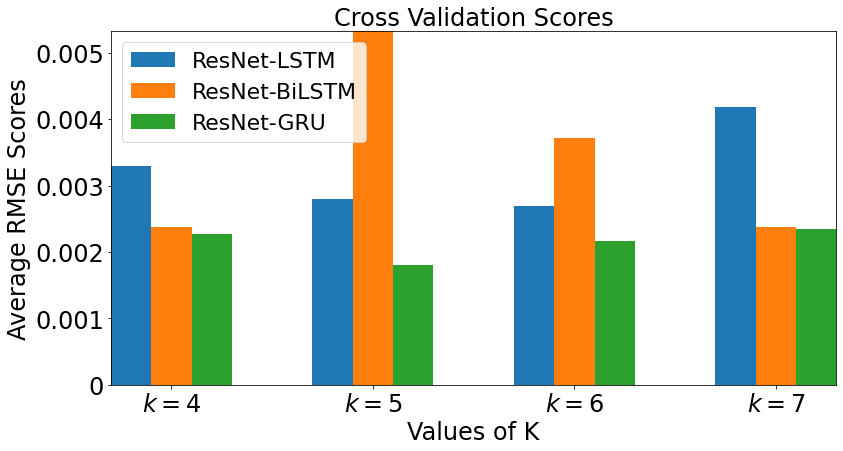

In [15]:
plot_cross_val([4,5, 6, 7], out, resnetDat, "TN")

# EINN

## Interpolation

In [16]:
def pinn_data(dat,npoints):
    """
    Use interpolation to get enough data for PINN
    """
    c1 =dat
    n =len(c1)
    c2 =c1.reshape((-1,))
    dd =np.arange(n)
    s1 =CubicSpline(dd,c2)
    tt=np.linspace(0,n, npoints)
    x, y =tt, s1(tt)
    xx, yy =x.reshape((-1,1)), y.reshape((-1,1))
    return xx, yy

## Model without vaccination

### Tennessee

Device mapping: no known devices.
Epoch: 0, Train Loss:2.860e+00, Test Loss:2.474e+00, beta: 0.50, gamma: 1.60, Time: 0.39
Epoch: 100, Train Loss:1.190e-01, Test Loss:3.356e-01, beta: 0.55, gamma: 1.55, Time: 2.78
Epoch: 200, Train Loss:1.201e-01, Test Loss:3.094e-01, beta: 0.60, gamma: 1.48, Time: 2.77
Epoch: 300, Train Loss:1.195e-01, Test Loss:2.741e-01, beta: 0.68, gamma: 1.38, Time: 2.78
Epoch: 400, Train Loss:1.156e-01, Test Loss:2.309e-01, beta: 0.76, gamma: 1.26, Time: 2.75
Epoch: 500, Train Loss:1.088e-01, Test Loss:1.854e-01, beta: 0.83, gamma: 1.12, Time: 2.76
Epoch: 600, Train Loss:9.858e-02, Test Loss:1.432e-01, beta: 0.86, gamma: 0.97, Time: 2.76
Epoch: 700, Train Loss:8.422e-02, Test Loss:1.059e-01, beta: 0.86, gamma: 0.81, Time: 2.78
Epoch: 800, Train Loss:6.596e-02, Test Loss:7.339e-02, beta: 0.82, gamma: 0.66, Time: 2.77
Epoch: 900, Train Loss:4.624e-02, Test Loss:4.662e-02, beta: 0.73, gamma: 0.50, Time: 2.77
Epoch: 1000, Train Loss:2.849e-02, Test Loss:2.670e-02, be

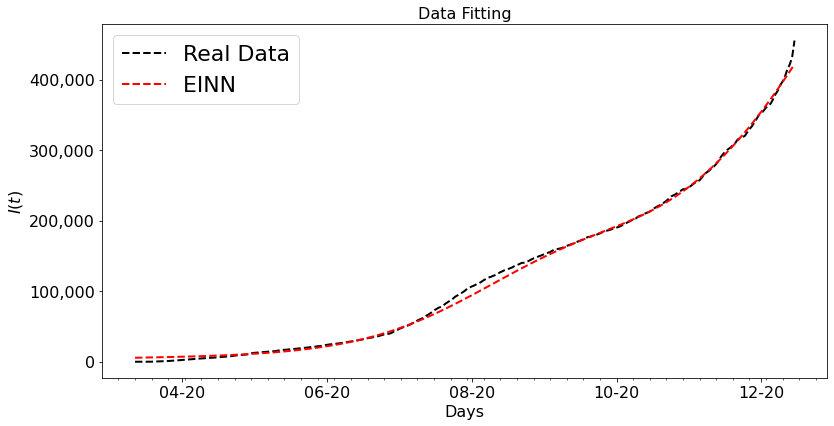

In [17]:
data =pd.read_csv('Data/tndata1.csv')
tdat=data.reindex(index=data.index[::-1])
tn =data['TOTAL_CONFIRMED']  #cumulative confirmed.
cc1 =np.array(tn).reshape((-1,1)) #reshape into 2D array.
tndata =cc1[::-1]  ##reverse the data from start to the end.
def model_without_vacc(data, epochs, bi, gi, name):
    xd1, yd1= pinn_data(data[:279],5000)
    if __name__ == "__main__":
        n_layers =[1, 80,80,80,80,80,3]
        v=0.0
        eta =0.0
        epochs=epochs
        scaler1 =MinMaxScaler()
        yd2 =scaler1.fit_transform(yd1)
        t=xd1
        i =yd2
        N=1.0
        split =0.8
        i0 =i[0:1,:]
        r0 =np.array([[0.0]])
        s0 =N-i0-r0
        U0=[s0,i0,r0]
        bi=bi
        gi=gi
        lb ,ub=t.min(0), t.max(0)
        N_f = 3000
        t_f = lb + (ub-lb)*lhs(1, N_f)
        tf =t_f
        model2 =sir_param(n_layers, i,t, lb, ub,bi,gi, v, eta, tf, U0, N, split)
        model2.train(epochs)
        x2, c2=pinn_data(data[:279], len(data[:279]))
        s2, i2, r2 =model2.predict(x2)
        I=scaler1.inverse_transform(i2)
        S=scaler1.inverse_transform(s2)
        R=scaler1.inverse_transform(r2)
        np.save(out+'dataTN', c2)
        np.save(out+'einndataTN', I)
        stime ='2020-03-12'
        dtrange=np.arange(len(c2)).reshape((-1,1))
        st=dates.datestr2num(stime)
        dtrange =dtrange +st
        font = 24
        fig, ax = plt.subplots() 
        ax.plot(dtrange,c2 , 'k--', lw=2,label='Real Data')
        ax.plot(dtrange, I , 'r--', lw=2,label='EINN ')
        ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
        ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
        ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

        ax.legend(fontsize=22)
        ax.tick_params(axis='both', labelsize = 16)
        # ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
        # ax.grid(True)
        ax.set_xlabel('Days', fontsize = 16)
        ax.set_ylabel('$I(t)$', fontsize = 16) 
        ax.set_title('Data Fitting',  fontsize = 16)
        fig.set_size_inches(w=13,h=6.5)
        plt.savefig('data_fit1.png') 
        beta_v1=model2.sess.run(model2.beta)
        gamma_v1=model2.sess.run(model2.gamma)
        beta2, gamma2 =round(beta_v1[0], 2), round(gamma_v1[0],2)
        R0=beta2/gamma2
        ##Relative Error and Absolute Error in Beta and Gamma
        beta_abs1=np.linalg.norm(0.5-beta2)
        beta_re1=np.linalg.norm(0.5-beta2)/np.linalg.norm(0.5)
        gamma_abs1=np.linalg.norm(1/7-gamma2)
        gamma_re1=np.linalg.norm(1/7-gamma2)/np.linalg.norm(1/7)
        print ('####### {} without Vaccination####'.format(name))
        print('Absolute Error in beta: {} and Relative Error in beta: {}'.format(beta_abs1, beta_re1))
        print('Absolute Error in gamma: {} and Relative Error in gamma: {}'.format(gamma_abs1, gamma_re1))
        print(beta2, gamma2, R0)
model_without_vacc(tndata, 1400, 0.5, 1.6, "Entire State")

Percent 0.2335


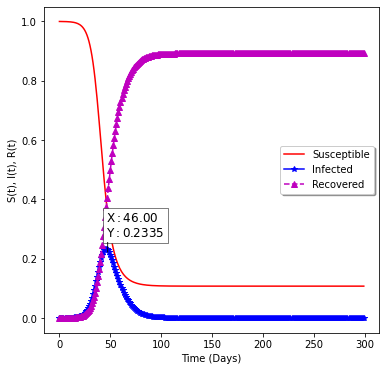

In [18]:
def sir_model(x ,t, beta, gamma, v, eta,N):
    S, I, R =x[0], x[1], x[2]
    dSdt =(-beta*S*I)/N -v*eta*S
    dIdt =(beta*S*I)/N-gamma*I
    dRdt =gamma*I+v*eta*S
    return [dSdt, dIdt, dRdt]

def vaccine(beta,gamma, v, eta, out, nT, N, name):
#     
    x0  =[0.9999,0.0001, 0.0]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(beta,gamma, v, eta,N))
    sp, ip, rp =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3]
    np.save(out+'S_{}_{}_{}'.format(eta, v, name), sp)
    np.save(out+'I_{}_{}_{}'.format(eta, v, name), ip)
    np.save(out+'R_{}_{}_{}'.format(eta, v, name), rp)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Percent %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] =6,6
    plt.plot(tt, sp, 'r')
    plt.plot(tt, ip, '-*b')
    plt.plot(tt, rp, '--^m')
#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+0.04),bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('S(t), I(t), R(t)')
    plt.legend(['Susceptible', 'Infected', 'Recovered'], shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}_{}.png'.format(name,eta, v))
    plt.show()
    return 
vaccine(0.35,0.14, 0.0, 0.94, out, 300, 1, "tn")

<!-- ### New York City -->

## Model with Vaccination when $\eta=94\%$


### Tennessee 

In [19]:
def model_with_vacc(data, epochs, bi, gi, name, eta):
    xd1, yd1= pinn_data(data[279:],5000)
    if __name__ == "__main__":
        n_layers =[1, 80,80,80,80,80,3]
        v=[0.005, 0.01, 0.02, 0.03, 0.06, 0.1]
        beta_arr=[]
        gamma_arr=[]
#         eta =0.94
        epochs=epochs
        scaler1 =MinMaxScaler()
        yd2 =scaler1.fit_transform(yd1)
        t=xd1
        i =yd2
        N=1.0
        split =0.8
        i0 =i[0:1,:]
        r0 =np.array([[0.0]])
        s0 =N-i0-r0
        U0=[s0,i0,r0]
        bi=bi
        gi=gi
        lb ,ub=t.min(0), t.max(0)
        N_f = 3000
        t_f = lb + (ub-lb)*lhs(1, N_f)
        tf =t_f
        for k in range(6):
            print('model when v={}'.format(v[k]))
            model2 =sir_param(n_layers, i,t, lb, ub,bi[k],gi[k], v[k], eta, tf, U0, N, split)
            model2.train(epochs[k])
            x2, c2=pinn_data(data[279:], len(data[279:]))
            s2, i2, r2 =model2.predict(x2)
            I=scaler1.inverse_transform(i2)
            S=scaler1.inverse_transform(s2)
            R=scaler1.inverse_transform(r2)
            beta_v1=model2.sess.run(model2.beta)
            gamma_v1=model2.sess.run(model2.gamma)
            beta2, gamma2 =round(beta_v1[0], 2), round(gamma_v1[0],2)
            beta_arr.append(beta2)
            gamma_arr.append(gamma2)
            R0=beta2/gamma2
            ##Relative Error and Absolute Error in Beta and Gamma
            beta_abs1=np.linalg.norm(0.5-beta2)
            beta_re1=np.linalg.norm(0.5-beta2)/np.linalg.norm(0.5)
            gamma_abs1=np.linalg.norm(1/7-gamma2)
            gamma_re1=np.linalg.norm(1/7-gamma2)/np.linalg.norm(1/7)
            print ('####### {} with Vaccination####'.format(name))
            print('Absolute Error in beta: {} and Relative Error in beta: {}'.format(beta_abs1, beta_re1))
            print('Absolute Error in gamma: {} and Relative Error in gamma: {}'.format(gamma_abs1, gamma_re1))
            print(beta2, gamma2, R0)
        return np.array(beta_arr), np.array(gamma_arr)
bi=[0.12, 0.1, 0.02, -0.03, 0.0, 0.05]  ##initialize the betas for different vaccination rates
gi=[1.5, 1.52, 1.52, 1.55, 1.5, 1.48]   ##initialize the gammas for different vaccination rates
epochs =[800, 800, 800, 800, 800,800]   ##set epochs
bb, gg=model_with_vacc(tndata, epochs, bi, gi, "Entire State", 0.94) ##run the model

model when v=0.005
Device mapping: no known devices.
Epoch: 0, Train Loss:2.810e+00, Test Loss:2.773e+00, beta: 0.12, gamma: 1.50, Time: 0.41
Epoch: 100, Train Loss:5.939e-01, Test Loss:8.695e-01, beta: 0.16, gamma: 1.40, Time: 2.79
Epoch: 200, Train Loss:5.864e-01, Test Loss:7.209e-01, beta: 0.18, gamma: 1.24, Time: 2.75
Epoch: 300, Train Loss:5.546e-01, Test Loss:4.787e-01, beta: 0.23, gamma: 1.06, Time: 2.77
Epoch: 400, Train Loss:4.297e-01, Test Loss:2.711e-01, beta: 0.33, gamma: 0.88, Time: 2.77
Epoch: 500, Train Loss:3.276e-01, Test Loss:1.628e-01, beta: 0.46, gamma: 0.71, Time: 2.78
Epoch: 600, Train Loss:2.248e-01, Test Loss:1.082e-01, beta: 0.47, gamma: 0.53, Time: 2.77
Epoch: 700, Train Loss:1.290e-01, Test Loss:6.488e-02, beta: 0.45, gamma: 0.36, Time: 2.76
Epoch: 800, Train Loss:5.927e-02, Test Loss:3.001e-02, beta: 0.43, gamma: 0.22, Time: 2.77
####### Entire State with Vaccination####
Absolute Error in beta: 0.06999999284744263 and Relative Error in beta: 0.13999998569488

<!-- #### Vaccination Model for UK -->

## SIR Model

In [20]:
def sir_model(x ,t, beta, gamma, v, eta,N):
    S, I, R =x[0], x[1], x[2]
    dSdt =(-beta*S*I)/N -v*eta*S
    dIdt =(beta*S*I)/N-gamma*I
    dRdt =gamma*I+v*eta*S
    return [dSdt, dIdt, dRdt]

def vaccine(beta,gamma, v, eta, out, nT, N, name):
#     
    x0  =[0.873*N,0.065*N, 0.062*N]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(beta,gamma, v, eta,N))
    sp, ip, rp =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3]
    np.save(out+'S_{}_{}_{}'.format(eta, v, name), sp)
    np.save(out+'I_{}_{}_{}'.format(eta, v, name), ip)
    np.save(out+'R_{}_{}_{}'.format(eta, v, name), rp)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Percent %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] =6,6
    plt.plot(tt, sp, 'r')
    plt.plot(tt, ip, '-*b')
    plt.plot(tt, rp, '--^m')
#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+0.04),bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('S(t), I(t), R(t)')
    plt.legend(['Susceptible', 'Infected', 'Recovered'], shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}_{}.png'.format(name,eta, v))
    plt.show()
    return 



## Plots for When $\eta=0.94\%$

Percent 0.1443


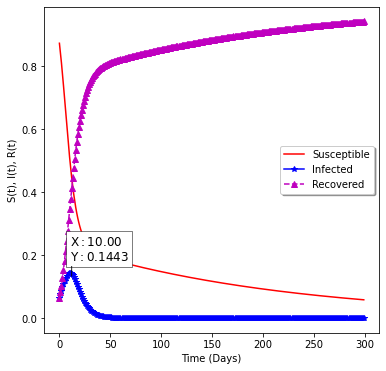

Percent 0.1541


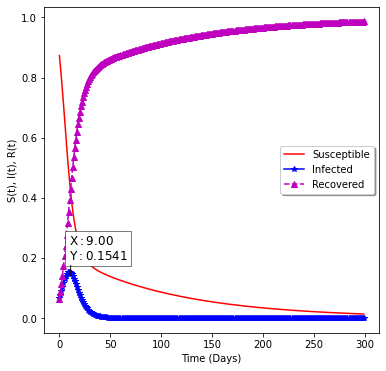

Percent 0.1243


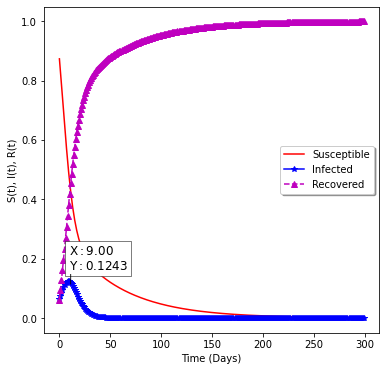

Percent 0.0917


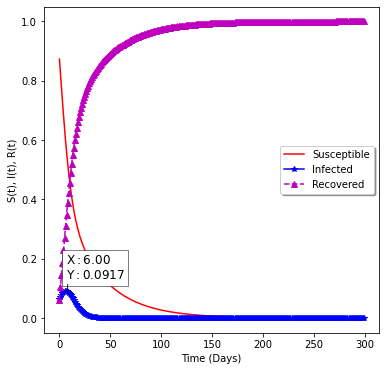

Percent 0.0855


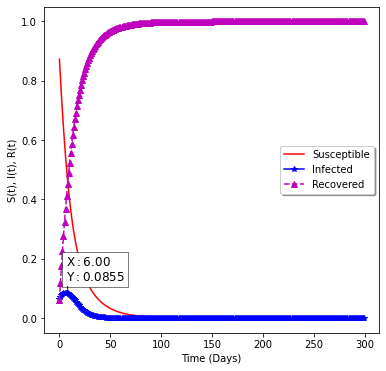

Percent 0.0650


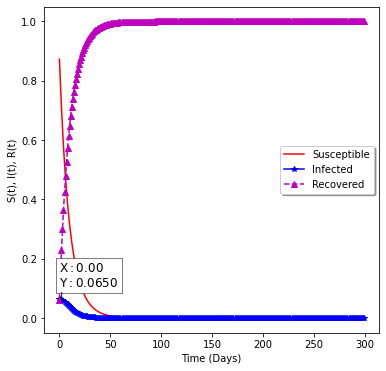

In [21]:
v=[0.005, 0.01, 0.02, 0.03, 0.06, 0.1]
for i in range(len(v)):
    vaccine(bb[i],gg[i], v[i], 0.94, out, 300, 1, "tn")